<h1 align="center"><font color='red'><span style="color:orange; font-size:larger; text-shadow: 2px 2px 4px #000000;">Breast Cancer Detection using machine learning</span></font></h1>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pickle

## Types of tumor

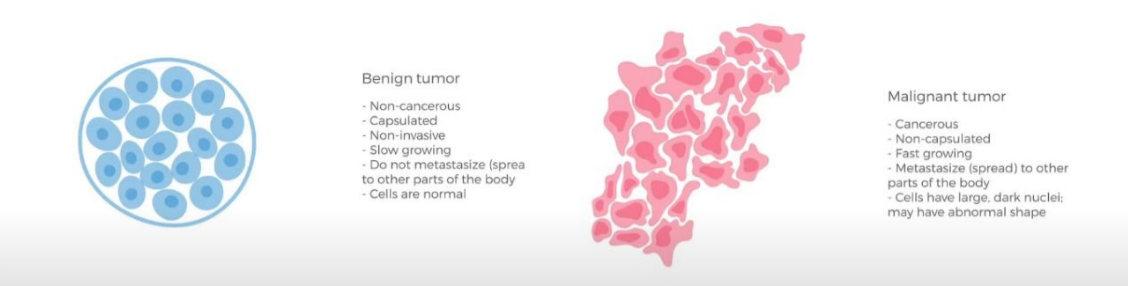

# <span style="color:skyblue; font-size:larger; text-shadow: 2px 2px 4px #000000;">Loading the Data</span>


In [3]:
data = pd.read_csv(r"C:\Users\varun\Downloads\data.csv")
data

,id,ClumpThick,UniSize,UniShape,MargAd,SingEpiCelSize,Bare Nuc,BlandChr,NormalNuc,Mito,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
data.shape

(698, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              698 non-null    int64 
 1   ClumpThick      698 non-null    int64 
 2   UniSize         698 non-null    int64 
 3   UniShape        698 non-null    int64 
 4   MargAd          698 non-null    int64 
 5   SingEpiCelSize  698 non-null    int64 
 6   Bare Nuc        698 non-null    object
 7   BlandChr        698 non-null    int64 
 8   NormalNuc       698 non-null    int64 
 9   Mito            698 non-null    int64 
 10  Class           698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
data["Class"]

0      2
1      2
2      2
3      2
4      4
      ..
693    2
694    2
695    4
696    4
697    4
Name: Class, Length: 698, dtype: int64

# <span style="color:pink; font-size:larger; text-shadow: 2px 2px 4px #000000;">Data Preprocessing</span>

Data preprocessing involves preparing raw data for analysis or machine learning by cleaning, transforming, selecting features, encoding categorical variables, integrating data sources, normalizing, and discretizing. It optimizes data quality and usability for accurate analysis or model training, crucial for extracting meaningful insights and making informed decisions.

In [7]:
data.drop(['id'], inplace = True, axis = 1)
data.replace('?', -99999, inplace = True)
data["Class"] = data["Class"].map(lambda x: 1 if x == 4 else 0)

In [8]:
data

,ClumpThick,UniSize,UniShape,MargAd,SingEpiCelSize,Bare Nuc,BlandChr,NormalNuc,Mito,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,0
694,2,1,1,1,2,1,1,1,1,0
695,5,10,10,3,7,3,8,10,2,1
696,4,8,6,4,3,4,10,6,1,1


In [9]:
data["Class"]

0      0
1      0
2      0
3      0
4      1
      ..
693    0
694    0
695    1
696    1
697    1
Name: Class, Length: 698, dtype: int64

In [10]:
data["Class"].value_counts()

Class
0    457
1    241
Name: count, dtype: int64

1 --> Benign <br>
2 --> malignant

# <span style="color:yellow; font-size:larger; text-shadow: 2px 2px 4px #000000;">Splitting the Data</span>

Splitting a dataset into training and testing subsets involves dividing data into two parts: one for training a model and another for evaluating its performance. The training set is used to train the model, while the testing set assesses its performance on unseen data, ensuring accurate evaluation and avoiding overfitting.

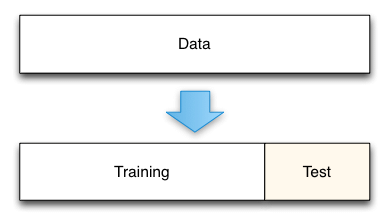

In [ ]:
# Defining X and y (Features and Labels)
X = np.array(data.drop(["Class"], axis = 1))
y = np.array(data["Class"])

############# Training and Testing the Models ##############
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.1, random_state = 0)

# <span style="color:lime; font-size:larger; text-shadow: 2px 2px 4px #000000;">Training the Models</span>


## Support Vector Classifier
Support Vector Classifier (SVC) is a supervised learning algorithm used for classification tasks. It works by finding the hyperplane that best separates different classes in the feature space. SVC aims to maximize the margin between classes, making it robust to outliers. It utilizes support vectors, which are data points closest to the hyperplane, to define the decision boundary. SVC can handle linear and non-linear classification tasks through various kernel functions like linear, polynomial, or radial basis function (RBF)
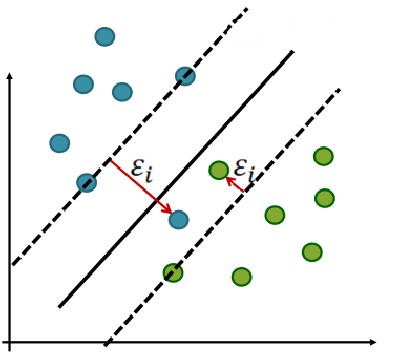

## Logistic Regression
Logistic Regression is a classification algorithm used to predict the probability of a binary outcome based on one or more predictor variables. It models the relationship between the predictor variables and the probability of the outcome using the logistic function. Logistic Regression estimates coefficients for each predictor, which are used to calculate the log-odds of the outcome. These log-odds are then transformed into probabilities using the logistic function. It's widely used due to its simplicity, interpretability, and effectiveness in many classification tasks.



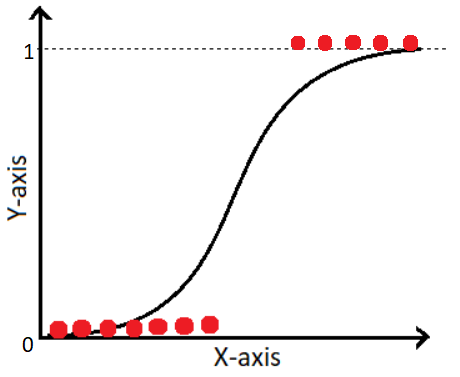

In [ ]:
# SVC Classifier
Classifier = SVC(kernel = 'linear')
model = Classifier.fit(X_train, y_train)
accu0 = model.score(X_test, y_test)
print("Accuracy of SVC: ", accu0)

# Logistic Regression
Classifier = LogisticRegression(solver = 'liblinear')
model = Classifier.fit(X_train, y_train)
accu1 = model.score(X_test, y_test)
print("Accuracy of Logistic Regression : ", accu1)

In [ ]:
pickle.dump(model, open("LogisticRegression.m", "wb"))

In [ ]:
# Loading The model
loaded_model = pickle.load(open("LogisticRegression.m", "rb"))
accu = loaded_model.score(X_test, y_test)

# <span style="color:turquoise; font-size:larger; text-shadow: 2px 2px 4px #000000;">Prediction</span>


In [ ]:
classes = ["Benign (no cancer)", "Malignant (cancer)"]

In [ ]:
sample = np.array([[5,10,10,10,7,7,3,8,9]])
result = loaded_model.predict(sample)
print(classes[int(result)])

In [ ]:
sample2 = np.array([[3,1,1,1,2,2,3,1,1]])
result = loaded_model.predict(sample2)
print(classes[int(result)])

In [ ]:
sample3 = np.array([[8,10,10,8,7,10,9,7,1]])
result = loaded_model.predict(sample3)
print(classes[int(result)])